---
## 0. Setup Environment

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
##

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os 
from sklearn.dummy import DummyRegressor
# Hello here is the error

---
## A. Project Description


The objective of this project is to develop a predictive model that estimates life expectancy based on a variety of health, demographic, and socio-economic indicators. By leveraging features such as immunization rates, mortality rates, GDP, population, schooling, and other relevant factors, the model aims to provide accurate life expectancy predictions. This will assist policymakers, researchers, and organizations in understanding the key drivers of life expectancy and in making informed decisions to improve public health outcomes. The project involves comprehensive data exploration, feature engineering, and model evaluation to ensure robust and reliable predictions that reflect real-world health dynamics.

---
## C. Data Understanding

### C.1   Load Datasets



In [240]:
# Load training data
training_df = pd.read_csv("../data/raw/Life_Expectancy_Data.csv")

### C.2 Explore Training Set


In [241]:
training_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [242]:
training_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [243]:
(training_df.isnull().sum()/len(training_df)*100).sort_values(ascending=False)

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
 BMI                                1.157250
Diphtheria                          0.646698
Polio                               0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Status                              0.000000
Country                             0.000000
Year                                0.000000
under-five deaths                   0.000000
Measles                             0.000000
percentage expenditure              0.000000
 HIV/AIDS                           0.000000
dtype: flo

In [244]:
training_df.duplicated().sum()

np.int64(0)

### C.3 Explore Numerical Features


In [245]:
training_df.describe(include= 'number')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [246]:
numerical_cols = training_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

### Check Null Value

In [247]:
(training_df[numerical_cols].isna().sum() / len(training_df) * 100.0).sort_values(ascending=False)

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 BMI                                1.157250
 thinness 5-9 years                 1.157250
 thinness  1-19 years               1.157250
Diphtheria                          0.646698
Polio                               0.646698
Adult Mortality                     0.340368
Life expectancy                     0.340368
infant deaths                       0.000000
Year                                0.000000
under-five deaths                   0.000000
Measles                             0.000000
percentage expenditure              0.000000
 HIV/AIDS                           0.000000
dtype: float64

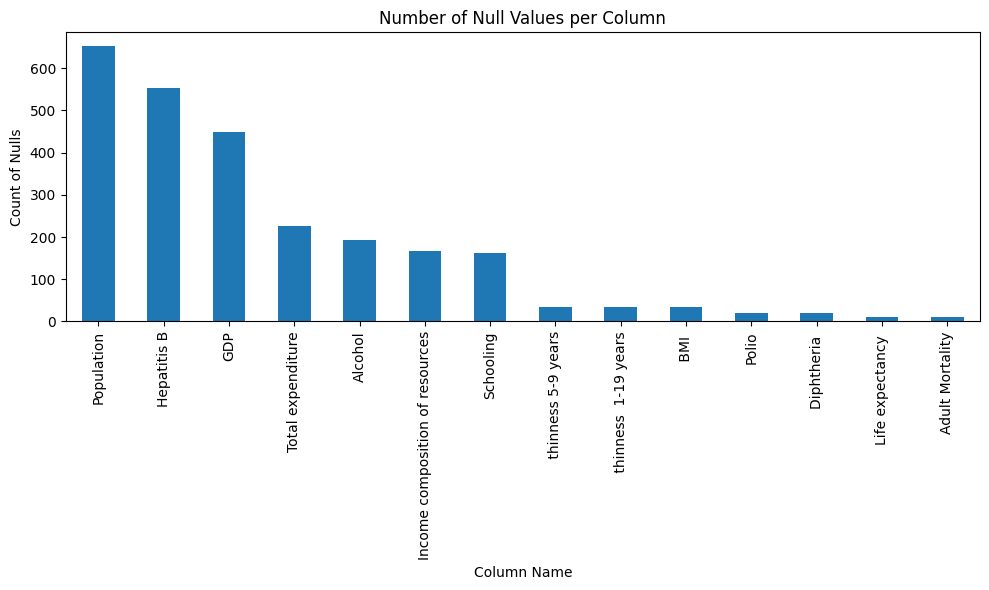

In [248]:
null_counts = training_df[numerical_cols].isnull().sum()
null_counts = null_counts[null_counts > 0]  # Only show columns with missing values

plt.figure(figsize=(10, 6))
null_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Null Values per Column')
plt.ylabel('Count of Nulls')
plt.xlabel('Column Name')
plt.tight_layout()
plt.show()

### Check for outliers

In [249]:
# Check for outliers in numerical columns using the IQR method

outlier_summary = {}

for col in numerical_cols:
    Q1 = training_df[col].quantile(0.25)
    Q3 = training_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = training_df[(training_df[col] < lower_bound) | (training_df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

# Convert to Series for sorting and display
outlier_summary = pd.Series(outlier_summary)
outlier_summary.sort_values(ascending=False)

 HIV/AIDS                          542
Measles                            542
under-five deaths                  394
percentage expenditure             389
GDP                                365
infant deaths                      315
Diphtheria                         298
Population                         294
Polio                              279
Hepatitis B                        254
Income composition of resources    130
 thinness 5-9 years                 96
 thinness  1-19 years               89
Adult Mortality                     82
Schooling                           44
Total expenditure                   32
Life expectancy                     10
Year                                 0
 BMI                                 0
Alcohol                              0
dtype: int64

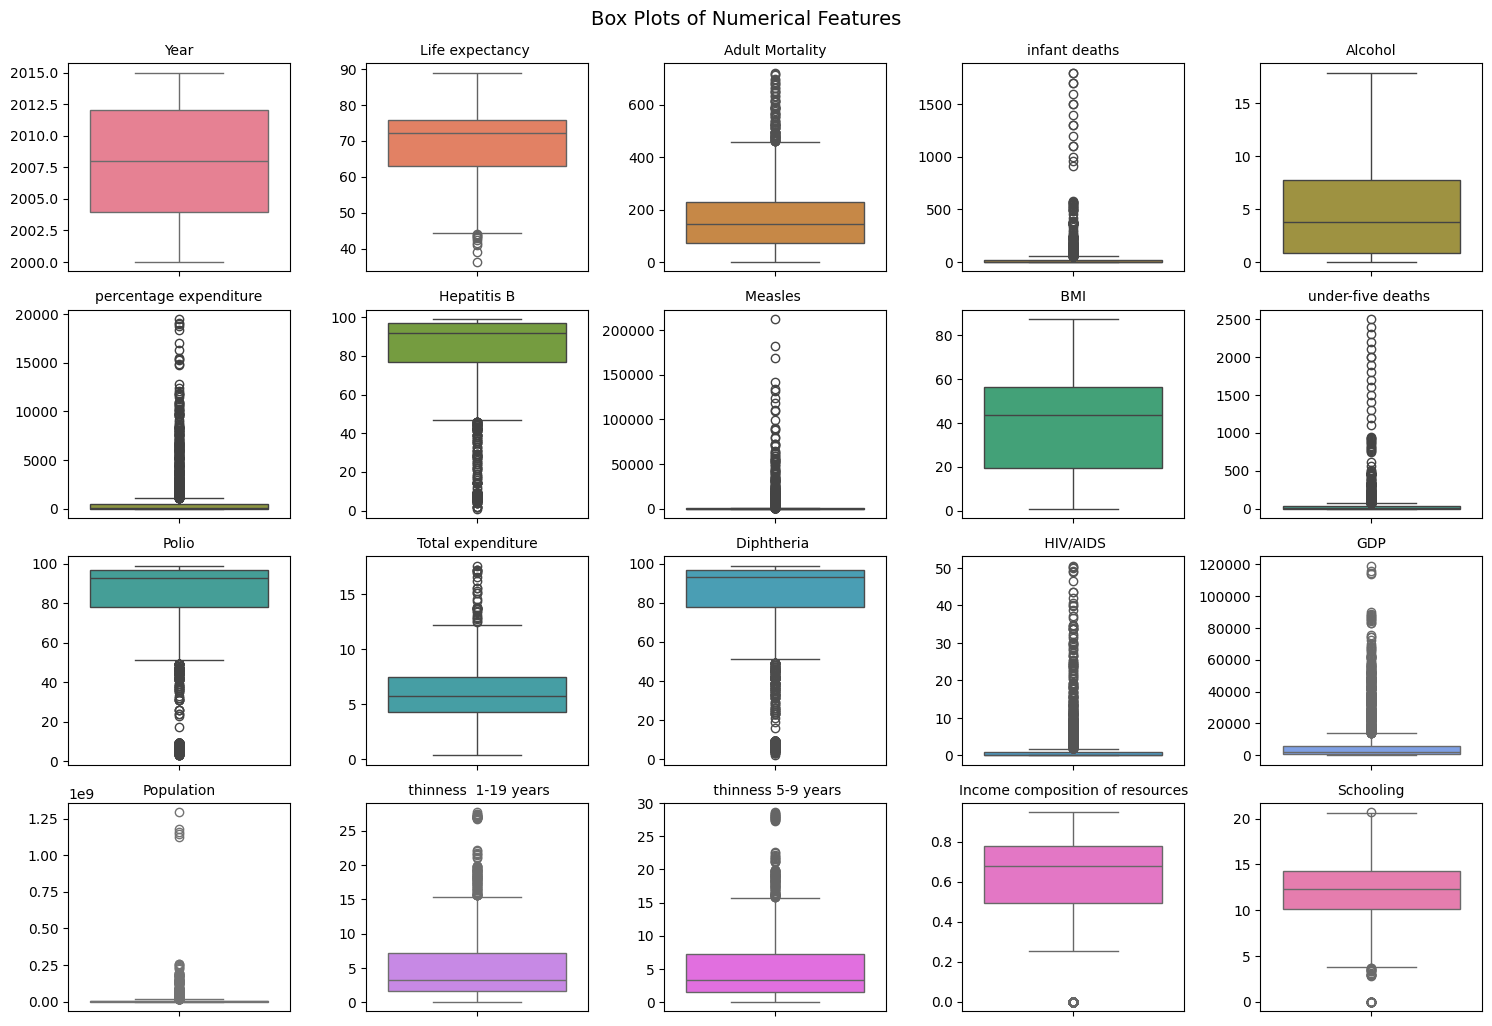

In [250]:
# Box plots for all numerical columns to visualize outliers using subplots
# Reduced size, improved layout, and different colors

palette = sns.color_palette("husl", len(numerical_cols))  # Use a colorful palette

num_cols = len(numerical_cols)
cols = 5  # Number of plots per row
rows = (num_cols // cols) + int(num_cols % cols > 0)

plt.figure(figsize=(3 * cols, 2.5 * rows))  # Smaller individual plots

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=training_df[col], color=palette[i % len(palette)])
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout(pad=1.0)

plt.suptitle("Box Plots of Numerical Features", fontsize=14, y=1.02)
plt.show()

### C.4 Explore Categorical Features


In [251]:
training_df.describe(include= 'object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [252]:
categorical_cols = training_df.select_dtypes(include='object').columns

### Checking for Null values

In [253]:
(training_df[categorical_cols].isna().sum() / len(training_df) * 100.0).sort_values(ascending=False)

Country    0.0
Status     0.0
dtype: float64

### C.5 Explore Target Variable




In [254]:
target_name = 'Life expectancy '
training_df[target_name].head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [255]:
training_df[target_name].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [256]:
training_df[target_name].isnull().sum()

np.int64(10)

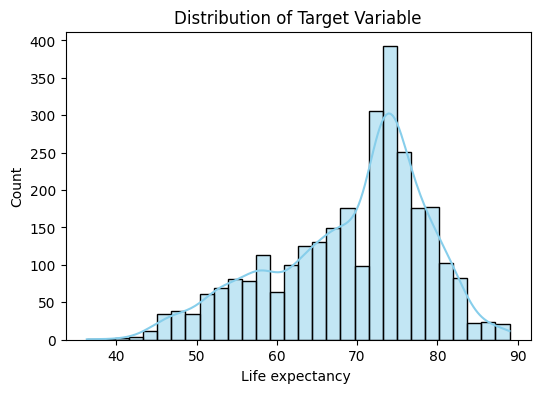

In [257]:
plt.figure(figsize=(6,4))
sns.histplot(training_df[target_name], kde=True, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel(target_name)
plt.show()

In [258]:
print("Skewness:", training_df[target_name].skew())


Skewness: -0.6386047358773552


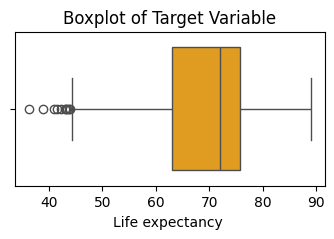

In [259]:
plt.figure(figsize=(4,2))
sns.boxplot(x=training_df[target_name], color='orange')
plt.title('Boxplot of Target Variable')
plt.show()

---
## E. Data Cleaning

### E.1 Copy Datasets



In [260]:
training_df_clean=training_df.copy()

### E.2 Fixing "Missing data "




#### Drop the rows which have missing values corresponding to the target variable

In [261]:
training_df_clean[target_name].isnull().sum()

np.int64(10)

In [262]:
# Drop the rows which have missing values corresponding to the target variable
training_df_clean = training_df.dropna(subset=[target_name])

In [263]:
training_df_clean[target_name].isnull().sum()

np.int64(0)

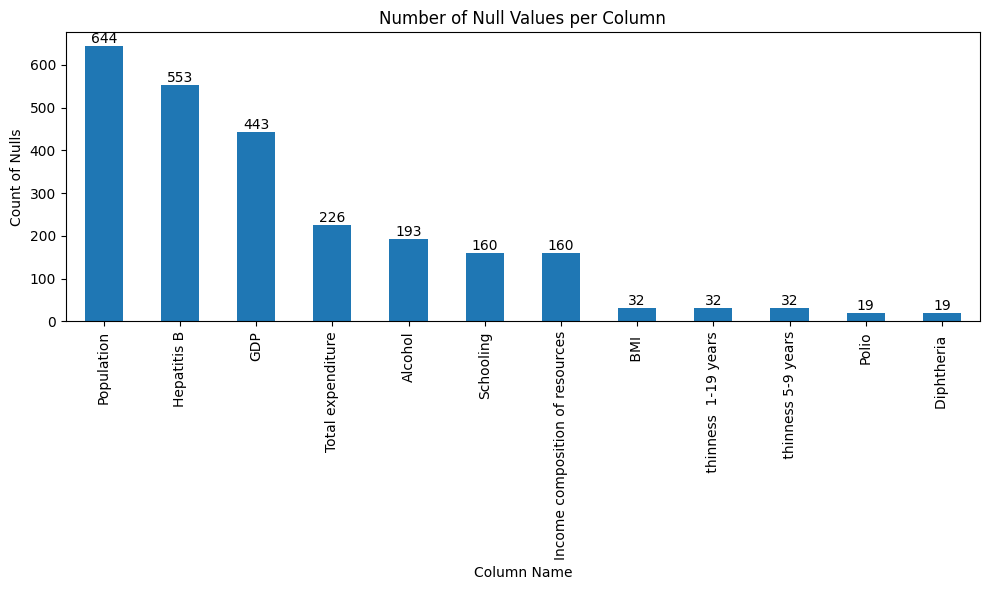

In [264]:
null_counts = training_df_clean.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Only show columns with missing values

plt.figure(figsize=(10, 6))
ax = null_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Null Values per Column')
plt.ylabel('Count of Nulls')
plt.xlabel('Column Name')
plt.tight_layout()

# Annotate bars with null count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

#### Population Column

In [265]:
training_df_clean.Population.head()

0    33736494.0
1      327582.0
2    31731688.0
3     3696958.0
4     2978599.0
Name: Population, dtype: float64

In [266]:
training_df_clean.Population.describe()

count    2.284000e+03
mean     1.276454e+07
std      6.103765e+07
min      3.400000e+01
25%      1.966738e+05
50%      1.391756e+06
75%      7.426746e+06
max      1.293859e+09
Name: Population, dtype: float64

It varries greatly so we cannot fill null values with the mean value

In [267]:
# percentage of null values in 'Population' column
training_df_clean.Population.isnull().sum()/len(training_df_clean)*100


np.float64(21.994535519125684)

##### lets try to find some relation of population colunm with coutnry and year column

In [268]:
training_df_clean.sort_values(['Country', 'Year'])[['Country', 'Year', 'Population']]

,Country,Year,Population
15,Afghanistan,2000,293756.0
14,Afghanistan,2001,2966463.0
13,Afghanistan,2002,21979923.0
12,Afghanistan,2003,2364851.0
11,Afghanistan,2004,24118979.0
...,...,...,...
2926,Zimbabwe,2011,14386649.0
2925,Zimbabwe,2012,1471826.0
2924,Zimbabwe,2013,155456.0
2923,Zimbabwe,2014,15411675.0


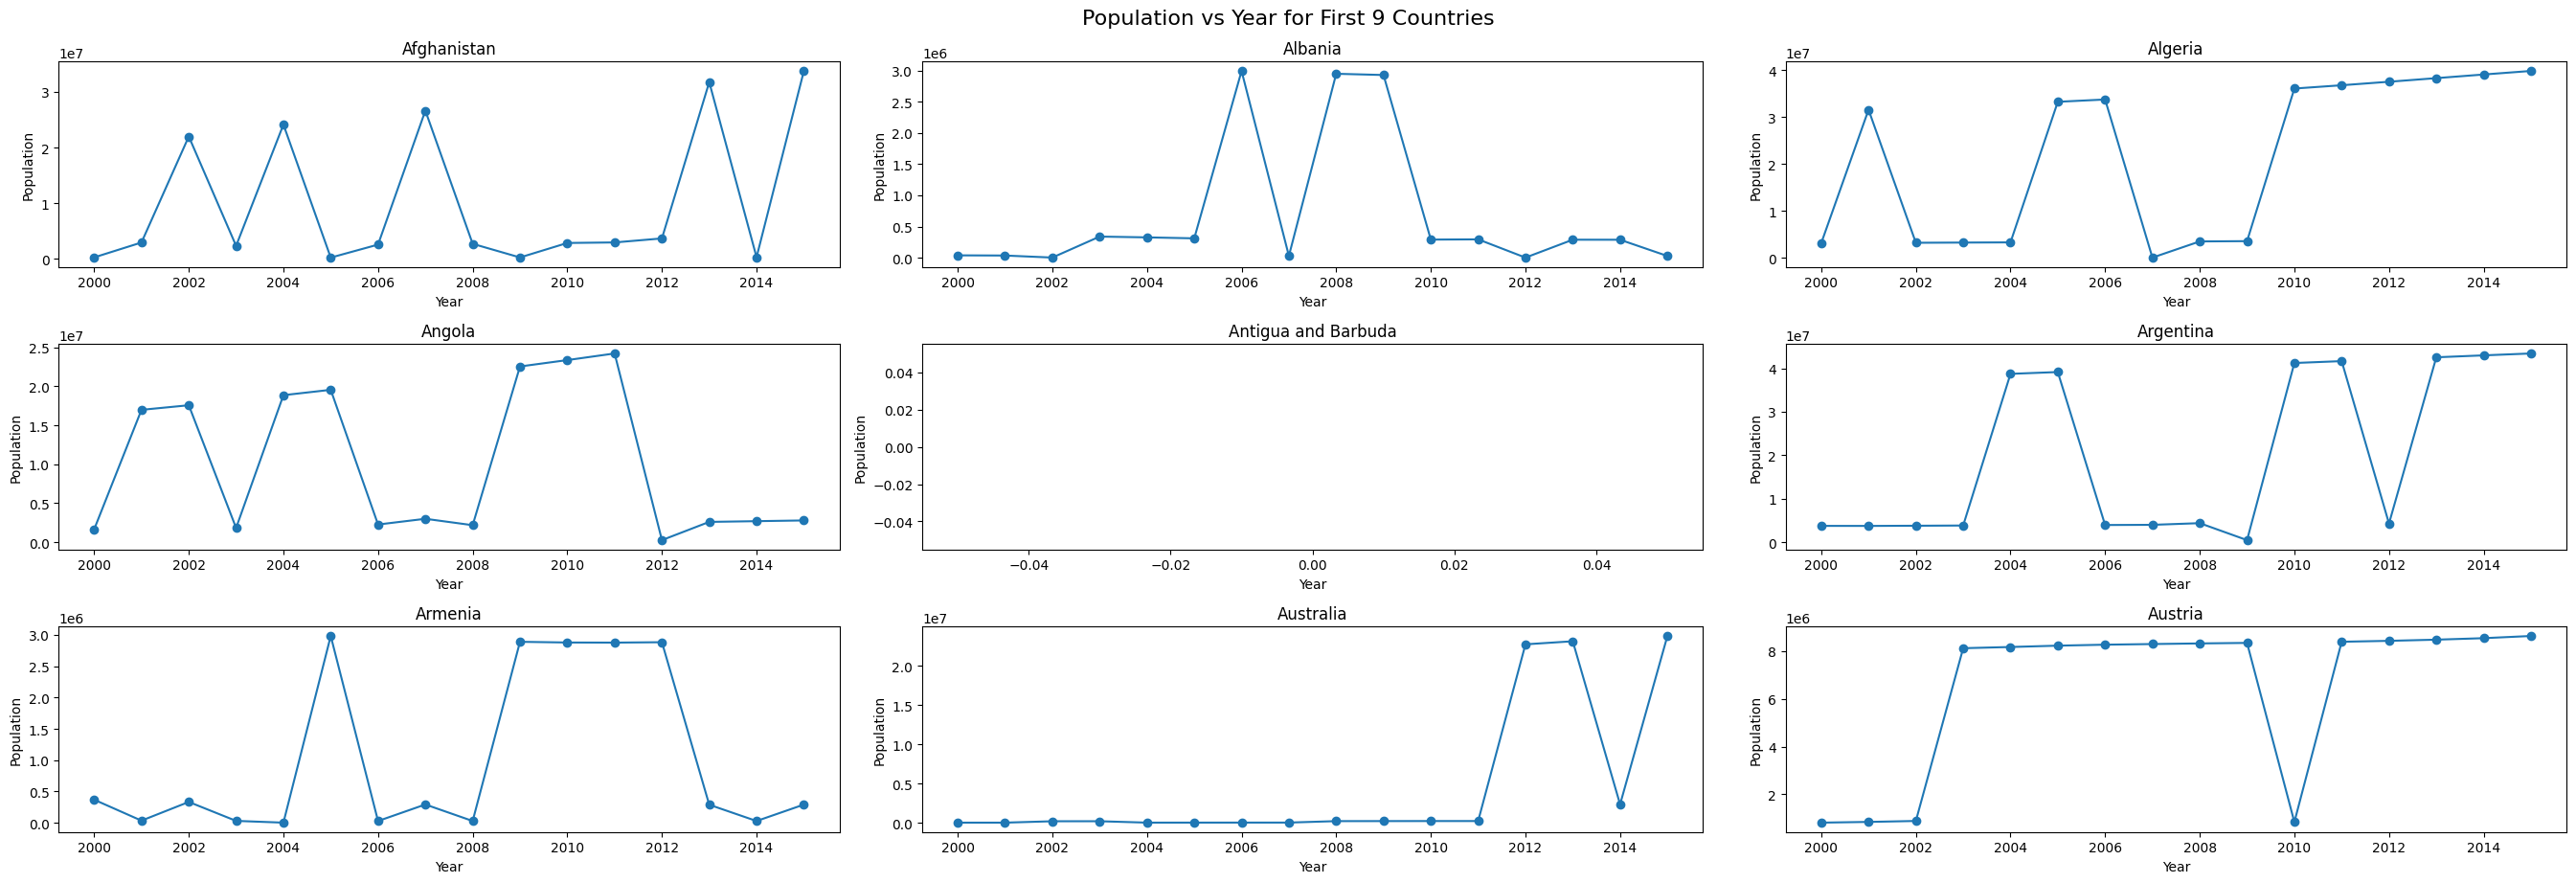

In [269]:
# Plot Population vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Population'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.tight_layout()

plt.suptitle('Population vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()

We can see there are some coutries where there is not data at all for population

In [270]:
# Show number of null values in 'Population' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Population'].apply(lambda x: x.isnull().sum())
print(nulls_by_country[nulls_by_country > 0].sort_values(ascending=False))

Country
Antigua and Barbuda                                     16
Bahamas                                                 16
Bahrain                                                 16
Barbados                                                16
Bolivia (Plurinational State of)                        16
Brunei Darussalam                                       16
Congo                                                   16
Cuba                                                    16
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Egypt                                                   16
Gambia                                                  16
Grenada                                                 16
Iran (Islamic Republic of)                              16
Kuwait                                          

In [271]:
training_df_clean[training_df_clean.Country=="Bahamas"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.0,96.0,0,...,96.0,7.74,96.0,0.1,NaN,NaN,2.5,2.5,0.789,12.6
162,Bahamas,2013,Developing,74.8,172.0,0,9.42,0.0,97.0,0,...,97.0,7.50,97.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
163,Bahamas,2012,Developing,74.9,167.0,0,9.50,0.0,96.0,0,...,99.0,7.43,98.0,0.2,NaN,NaN,2.5,2.5,0.789,12.6
164,Bahamas,2011,Developing,75.0,162.0,0,9.34,0.0,95.0,0,...,97.0,7.63,98.0,0.1,NaN,NaN,2.5,2.5,0.788,12.6
165,Bahamas,2010,Developing,75.0,161.0,0,9.19,0.0,98.0,0,...,97.0,7.44,99.0,0.2,NaN,NaN,2.5,2.5,0.788,12.6
166,Bahamas,2009,Developing,74.6,168.0,0,9.29,0.0,95.0,0,...,97.0,7.43,96.0,0.1,NaN,NaN,2.5,2.5,0.791,12.6
167,Bahamas,2008,Developing,74.5,167.0,0,10.15,0.0,9.0,0,...,93.0,7.30,93.0,0.1,NaN,NaN,2.5,2.5,0.791,12.6
168,Bahamas,2007,Developing,74.4,167.0,0,10.75,0.0,93.0,0,...,95.0,7.80,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.5
169,Bahamas,2006,Developing,74.2,171.0,0,11.07,0.0,96.0,0,...,94.0,6.93,95.0,0.1,NaN,NaN,2.5,2.5,0.788,12.4


- 16 Null values corresponds to yeach year present in the data 
- SO for most countries we donot have data at all corresponding to population 
- so we decide to drop this column

In [272]:
training_df_clean.drop(columns=['Population'], inplace=True)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\3201331770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean.drop(columns=['Population'], inplace=True)


#### Hepatitis B Column

In [273]:
# percentage of null values in 'Population' column
training_df_clean['Hepatitis B'].isnull().sum()/len(training_df_clean)*100


np.float64(18.886612021857925)

In [274]:

training_df_clean['Hepatitis B'].describe()



count    2375.000000
mean       80.960842
std        25.018337
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [275]:
training_df_clean['Hepatitis B'].value_counts().sort_values(ascending=False)

Hepatitis B
99.0    237
98.0    209
96.0    166
97.0    154
95.0    149
       ... 
23.0      1
26.0      1
12.0      1
32.0      1
19.0      1
Name: count, Length: 87, dtype: int64

In [276]:
training_df_clean[training_df_clean['Hepatitis B'].isnull()].head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,23,87.0,3.60,87.0,0.1,294.335560,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,23,86.0,3.73,86.0,0.1,1774.336730,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,24,89.0,3.84,89.0,0.1,1732.857979,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,25,86.0,3.49,86.0,0.1,1757.177970,6.5,6.4,0.636,10.7
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,143,36.0,4.54,34.0,2.5,262.415149,9.8,9.7,0.439,7.2


C:\Users\agama\AppData\Local\Temp\ipykernel_15364\79149052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['HepB_bins'] = pd.cut(training_df_clean['Hepatitis B'], bins=bins, labels=labels, include_lowest=True)


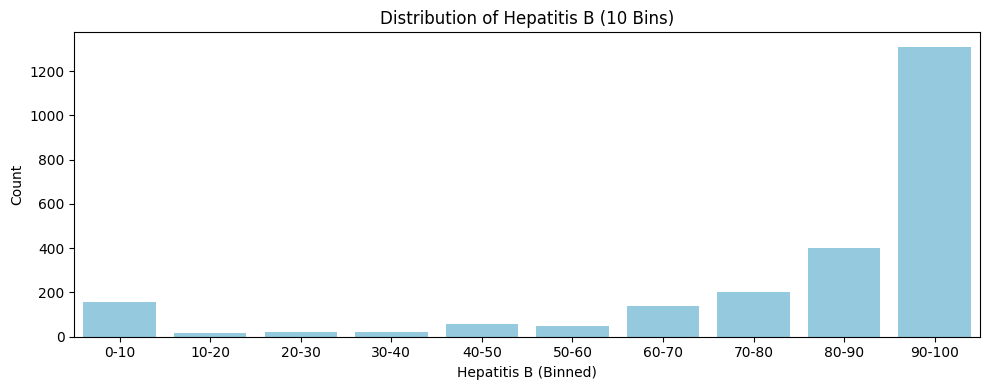

In [277]:
# Bar plot to visualize the distribution of 'Hepatitis B' column with 10 bins

# Create 10 bins for Hepatitis B values
bins = np.linspace(0, 100, 11)  # 10 equal-width bins from 0 to 100
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
training_df_clean['HepB_bins'] = pd.cut(training_df_clean['Hepatitis B'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 4))
sns.countplot(x='HepB_bins', data=training_df_clean, color='skyblue')
plt.title('Distribution of Hepatitis B (10 Bins)')
plt.xlabel('Hepatitis B (Binned)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

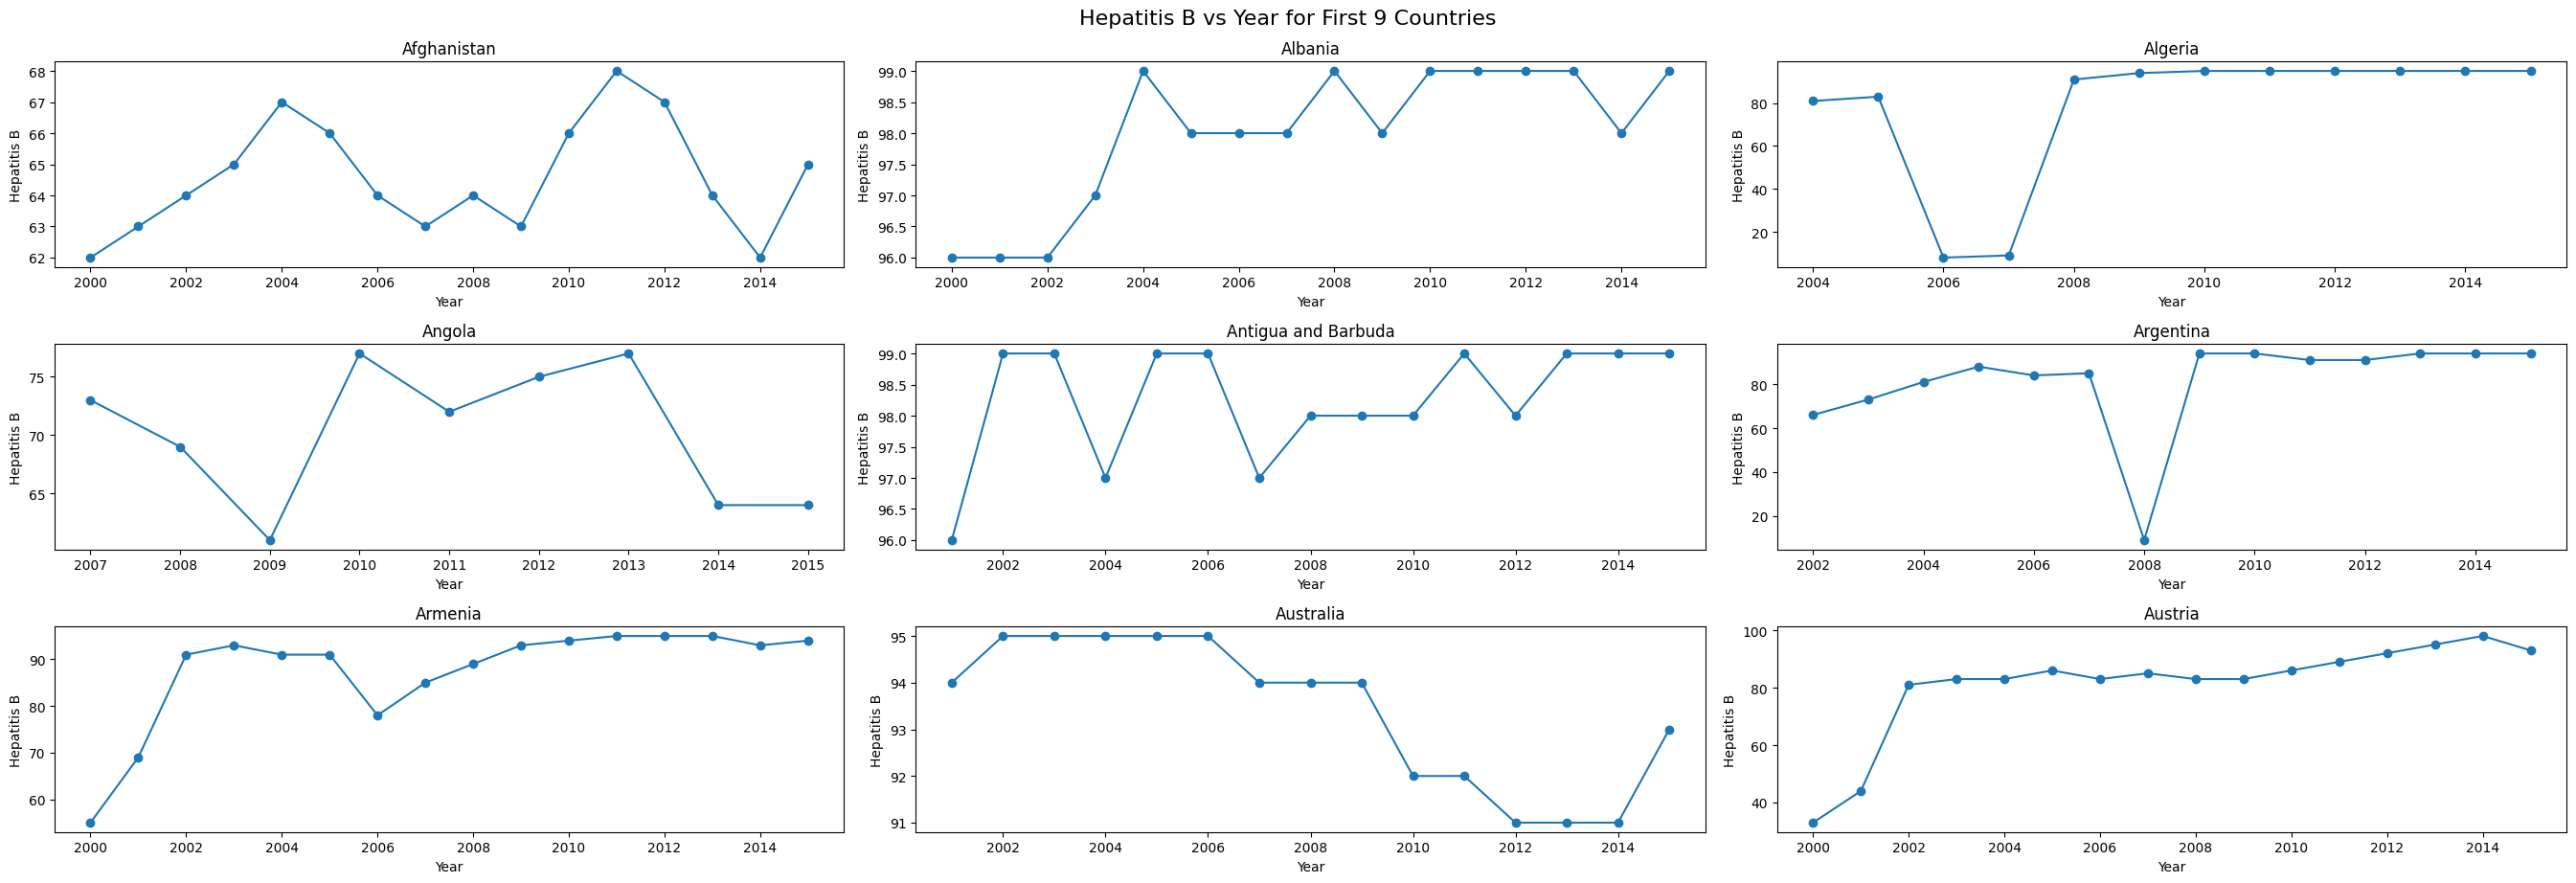

In [278]:
# Plot Hepatitis B vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Hepatitis B'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Hepatitis B')
    plt.tight_layout()

plt.suptitle('Hepatitis B vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()

In [279]:
# Show number of null values in 'Hepatitis B' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Hepatitis B'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
Finland                                                 16
Denmark                                                 16
Norway                                                  16
Slovenia                                                16
United Kingdom of Great Britain and Northern Ireland    16
                                                        ..
Guyana                                                   1
Mozambique                                               1
Grenada                                                  1
Panama                                                   1
Russian Federation                                       1
Name: Hepatitis B, Length: 98, dtype: int64

In [280]:
training_df_clean['Hepatitis B'].isnull().sum()

np.int64(553)

In [281]:
# Fill null values in 'Hepatitis B' with the mean for each (Country, Year) group
training_df_clean['Hepatitis B'] = training_df_clean.groupby(['Country', 'Year'])['Hepatitis B'].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\851729745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Hepatitis B'] = training_df_clean.groupby(['Country', 'Year'])['Hepatitis B'].transform(


In [282]:
# Fill remaining null values in 'Hepatitis B' with the mean for each (Year) group
training_df_clean['Hepatitis B'] = training_df_clean.groupby([ 'Year'])['Hepatitis B'].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\2834368609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Hepatitis B'] = training_df_clean.groupby([ 'Year'])['Hepatitis B'].transform(


In [283]:
training_df_clean['Hepatitis B'].isnull().sum()

np.int64(0)

#### GDP Column

In [284]:
# percentage of null values in 'GDP' column
training_df_clean['GDP'].isnull().sum()/len(training_df_clean)*100


np.float64(15.129781420765026)

In [285]:

training_df_clean['GDP'].describe()


count      2485.000000
mean       7494.210719
std       14282.251492
min           1.681350
25%         463.852618
50%        1764.973870
75%        5932.899677
max      119172.741800
Name: GDP, dtype: float64

In [286]:
training_df_clean['GDP'].value_counts().sort_values(ascending=False)


GDP
584.259210    1
612.696514    1
631.744976    1
669.959000    1
63.537231     1
             ..
454.366654    1
453.351155    1
57.348340     1
548.587312    1
547.358878    1
Name: count, Length: 2485, dtype: int64

In [287]:
training_df_clean[training_df_clean['GDP'].isnull()].head()



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,HepB_bins
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,2.5,2.5,0.790,12.6,90-100
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.0,96.0,0,...,96.0,7.74,96.0,0.1,NaN,2.5,2.5,0.789,12.6,90-100
162,Bahamas,2013,Developing,74.8,172.0,0,9.42,0.0,97.0,0,...,97.0,7.50,97.0,0.1,NaN,2.5,2.5,0.790,12.6,90-100
163,Bahamas,2012,Developing,74.9,167.0,0,9.50,0.0,96.0,0,...,99.0,7.43,98.0,0.2,NaN,2.5,2.5,0.789,12.6,90-100
164,Bahamas,2011,Developing,75.0,162.0,0,9.34,0.0,95.0,0,...,97.0,7.63,98.0,0.1,NaN,2.5,2.5,0.788,12.6,90-100


C:\Users\agama\AppData\Local\Temp\ipykernel_15364\1381885115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['HepB_bins'] = pd.cut(training_df_clean['GDP'], bins=bins, labels=labels, include_lowest=True)


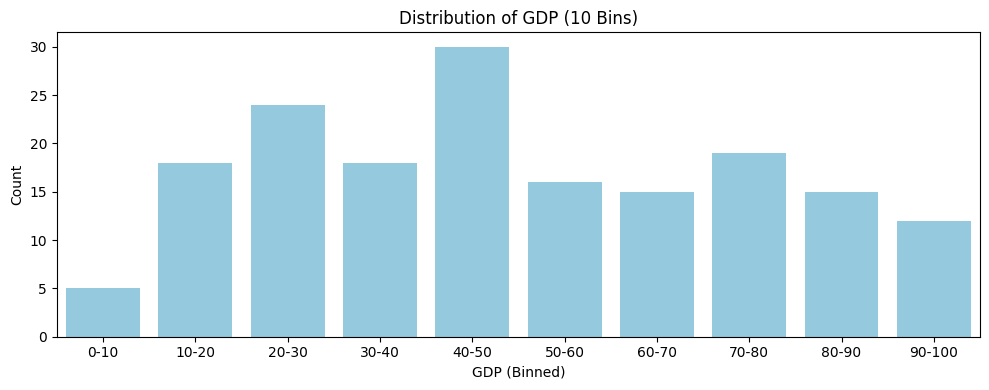

In [288]:
# Bar plot to visualize the distribution of 'GDP' column with 10 bins

# Create 10 bins for GDP values
bins = np.linspace(0, 100, 11)  # 10 equal-width bins from 0 to 100
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
training_df_clean['HepB_bins'] = pd.cut(training_df_clean['GDP'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 4))
sns.countplot(x='HepB_bins', data=training_df_clean, color='skyblue')
plt.title('Distribution of GDP (10 Bins)')
plt.xlabel('GDP (Binned)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


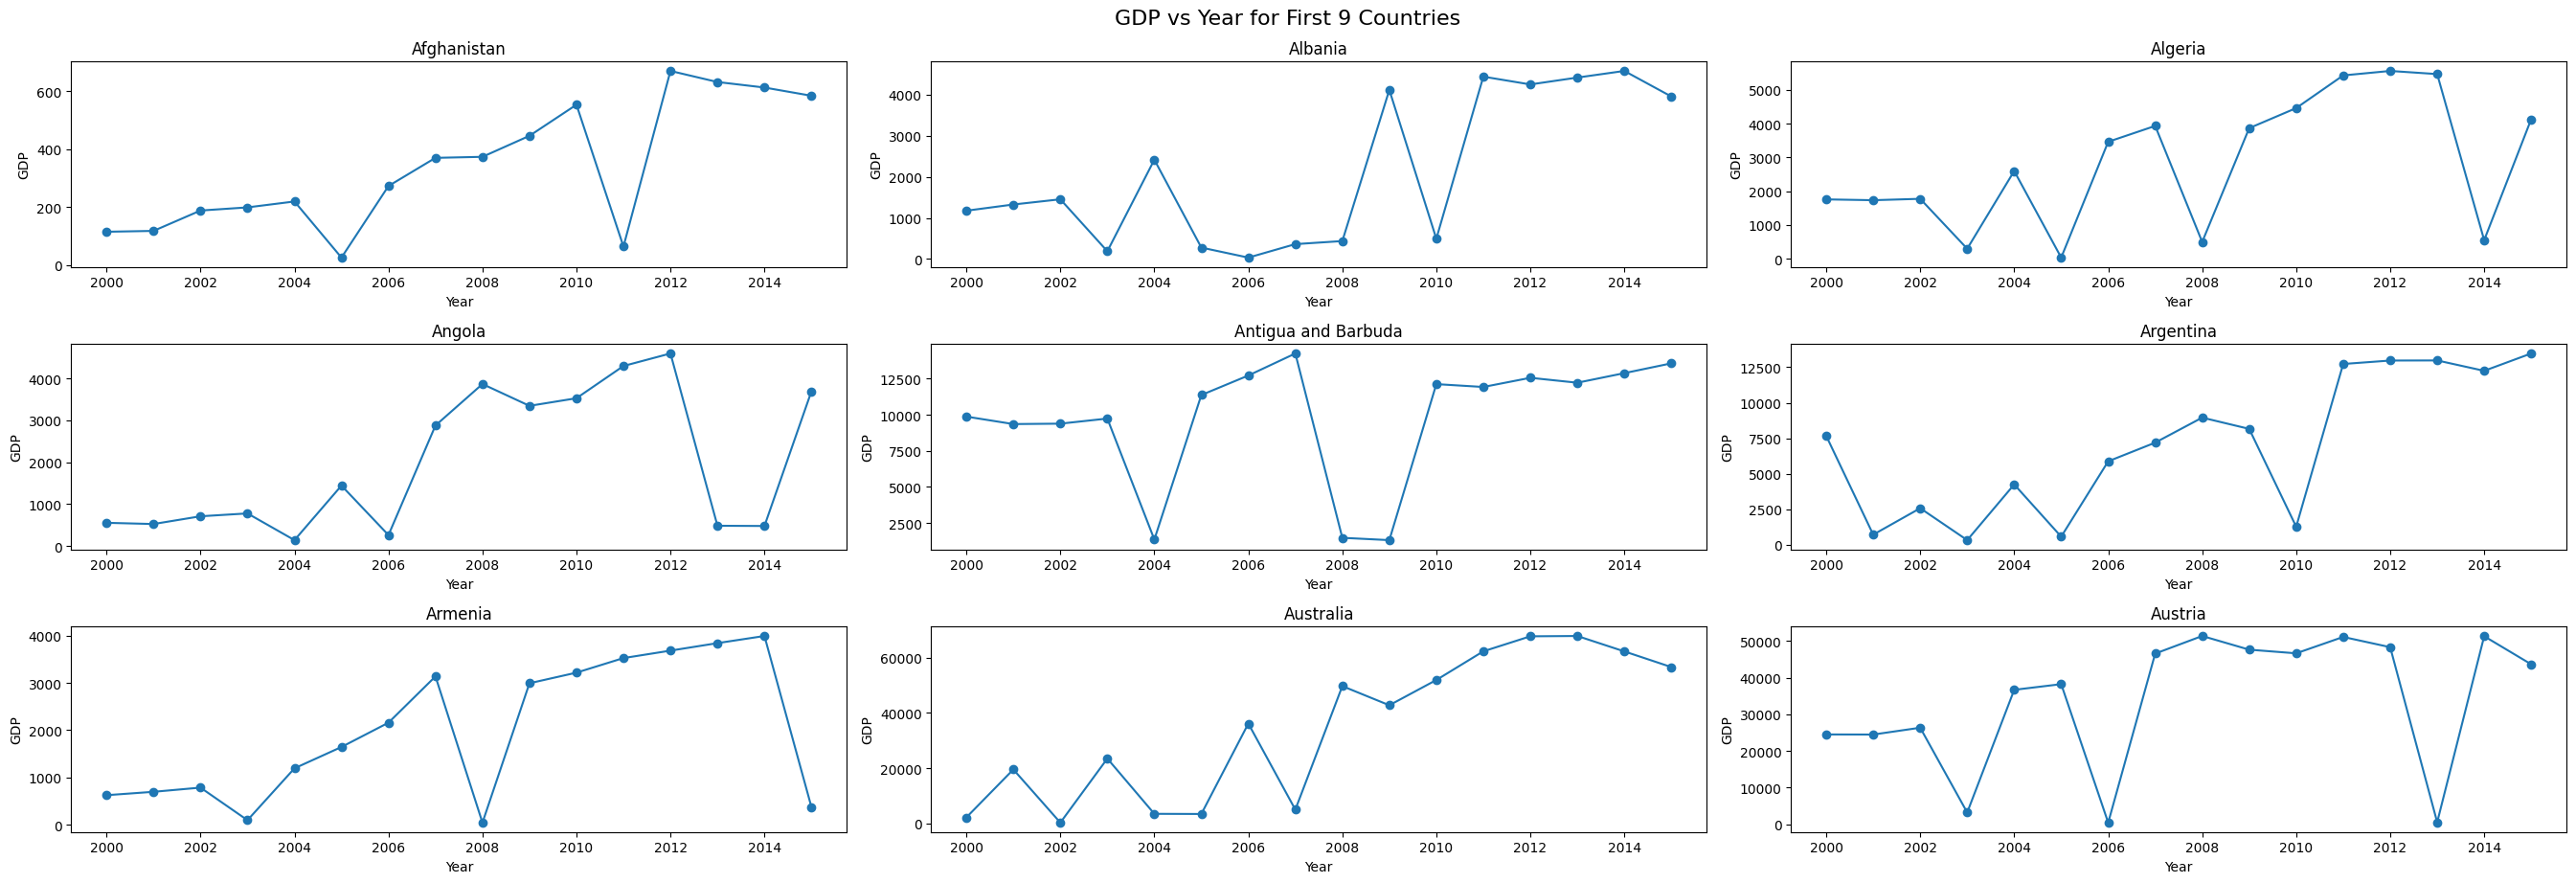

In [289]:

# Plot GDP vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.tight_layout()

plt.suptitle('GDP vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


In [290]:

# Show number of null values in 'GDP' column for each country
nulls_by_country = training_df_clean.groupby('Country')['GDP'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)


Country
Bahamas                                                 16
Bolivia (Plurinational State of)                        16
Congo                                                   16
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Egypt                                                   16
Gambia                                                  16
Micronesia (Federated States of)                        16
Iran (Islamic Republic of)                              16
Kyrgyzstan                                              16
Lao People's Democratic Republic                        16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                               

In [291]:
training_df_clean.GDP.isnull().sum()

np.int64(443)

In [292]:
# Fill null values in 'GDP' with the mean for each (Country, Year) group
training_df_clean['GDP'] = training_df_clean.groupby(['Country', 'Year'])['GDP'].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\2055515303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['GDP'] = training_df_clean.groupby(['Country', 'Year'])['GDP'].transform(


In [293]:
# Fill the remaining by null values in 'GDP' with the mean for each ( Year) group
training_df_clean['GDP'] = training_df_clean.groupby(['Year'])['GDP'].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\2276379872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['GDP'] = training_df_clean.groupby(['Year'])['GDP'].transform(


In [294]:
training_df_clean.GDP.isnull().sum()

np.int64(0)

#### TOTAL EXPENDITURE COLUMN

In [ ]:
# percentage of null values in 'Total expenditure' column
training_df_clean['Total expenditure'].isnull().sum()/len(training_df_clean)*100


np.float64(7.718579234972678)

In [296]:
training_df_clean['Total expenditure'].describe()


count    2702.000000
mean        5.930163
std         2.483273
min         0.370000
25%         4.260000
50%         5.750000
75%         7.490000
max        17.600000
Name: Total expenditure, dtype: float64

In [297]:
training_df_clean['Total expenditure'].value_counts().sort_values(ascending=False)


Total expenditure
4.60     15
6.70     12
5.60     11
9.10     10
5.25     10
         ..
7.14      1
11.93     1
2.72      1
7.31      1
17.14     1
Name: count, Length: 816, dtype: int64

In [298]:
training_df_clean[training_df_clean['Total expenditure'].isnull()].head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,HepB_bins
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,6.0,5.8,0.743,14.4,NaN
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,8.3,8.2,0.531,11.4,NaN
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,3.3,3.3,0.784,13.9,NaN
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,1.0,0.9,0.826,17.3,NaN
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,2.1,2.2,0.741,12.7,NaN


C:\Users\agama\AppData\Local\Temp\ipykernel_15364\1162003629.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['HepB_bins'] = pd.cut(training_df_clean['Total expenditure'], bins=bins, labels=labels, include_lowest=True)


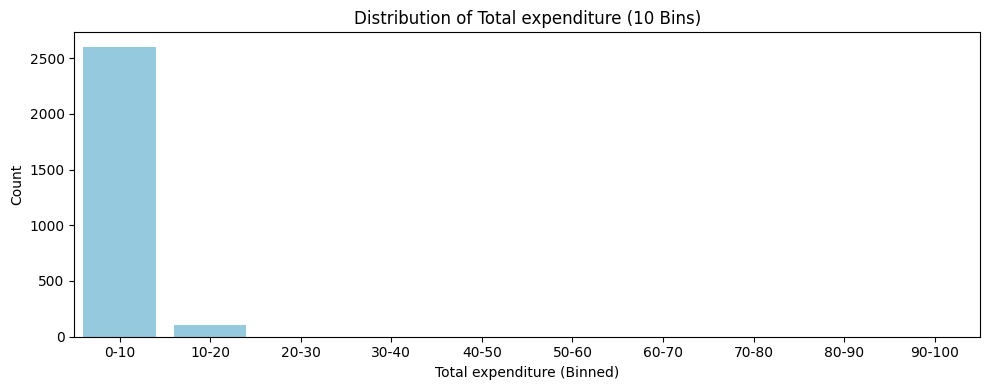

In [299]:
# Bar plot to visualize the distribution of 'Total expenditure' column with 10 bins

# Create 10 bins for Total expenditure values
bins = np.linspace(0, 100, 11)  # 10 equal-width bins from 0 to 100
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
training_df_clean['HepB_bins'] = pd.cut(training_df_clean['Total expenditure'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 4))
sns.countplot(x='HepB_bins', data=training_df_clean, color='skyblue')
plt.title('Distribution of Total expenditure (10 Bins)')
plt.xlabel('Total expenditure (Binned)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


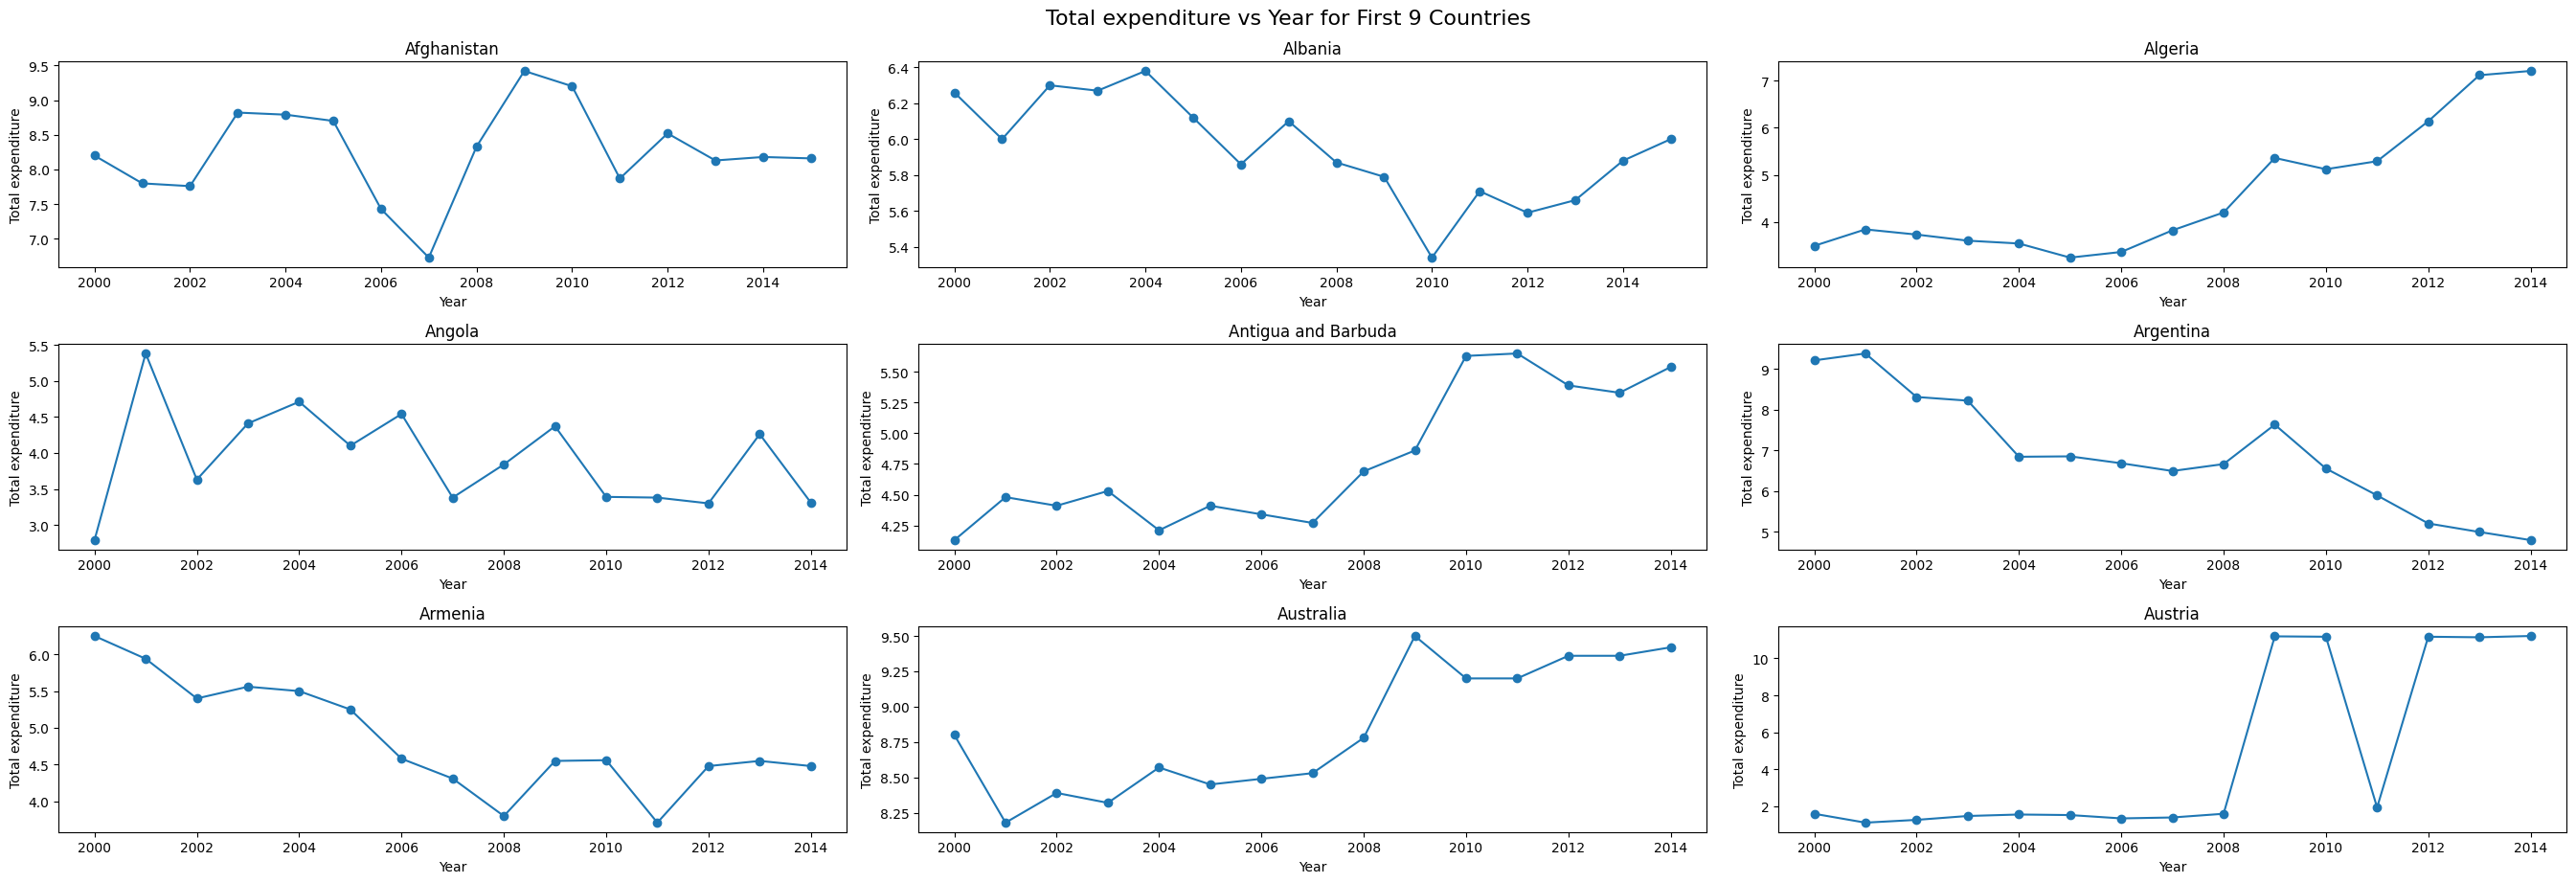

In [300]:

# Plot Total expenditure vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total expenditure'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Total expenditure')
    plt.tight_layout()

plt.suptitle('Total expenditure vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


In [301]:

# Show number of null values in 'Total expenditure' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Total expenditure'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
Democratic People's Republic of Korea    16
Somalia                                  16
South Sudan                              13
Iraq                                      4
Angola                                    1
                                         ..
Venezuela (Bolivarian Republic of)        1
Viet Nam                                  1
Yemen                                     1
Zambia                                    1
Zimbabwe                                  1
Name: Total expenditure, Length: 181, dtype: int64

In [304]:
training_df_clean['Total expenditure'].isnull().sum()

np.int64(47)

In [303]:
# Interpolate null values in 'Total expenditure' by sorting and grouping by Country and Year
training_df_clean['Total expenditure'] = (
    training_df_clean
    .sort_values(['Country', 'Year'])
    .groupby('Country')['Total expenditure']
    .transform(lambda x: x.interpolate(method='linear'))
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\3067905093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Total expenditure'] = (


In [232]:
# Fill null values in 'Total expenditure' with the mean for each (Country, Year) group
training_df_clean['Total expenditure'] = training_df_clean.groupby(['Country', 'Year'])['Total expenditure'].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\1022826548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Total expenditure'] = training_df_clean.groupby(['Country', 'Year'])['Total expenditure'].transform(


In [234]:
# Fill null values in 'Total expenditure' with the mean for each (Country, Year) group
training_df_clean['Total expenditure'] = training_df_clean.groupby(['Country'])['Total expenditure'].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\1057900578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Total expenditure'] = training_df_clean.groupby(['Country'])['Total expenditure'].transform(


In [236]:
# Fill null values in 'Total expenditure' with the mean for each (Year) group
training_df_clean['Total expenditure'] = training_df_clean.groupby([ 'Year'])['Total expenditure'].transform(
    lambda x: x.fillna(x.mean())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_15364\4230909697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Total expenditure'] = training_df_clean.groupby([ 'Year'])['Total expenditure'].transform(


In [237]:
training_df_clean['Total expenditure'].isnull().sum()

np.int64(0)

#### Alcohol Column

In [305]:
# percentage of null values in 'Alcohol' column
training_df_clean['Alcohol'].isnull().sum()/len(training_df_clean)*100

np.float64(6.591530054644809)

In [ ]:

training_df_clean['Alcohol'].describe()

In [306]:

training_df_clean['Alcohol'].value_counts().sort_values(ascending=False)

Alcohol
0.01    280
0.03     15
0.04     13
0.09     12
0.02     12
       ... 
5.85      1
7.73      1
2.57      1
2.59      1
2.70      1
Name: count, Length: 1076, dtype: int64

In [307]:

training_df_clean[training_df_clean['Alcohol'].isnull()].head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,HepB_bins
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,7.21,95.0,0.1,4132.762920,6.0,5.8,0.743,14.4,NaN
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,3.31,64.0,1.9,3695.793748,8.3,8.2,0.531,11.4,NaN
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,5.54,99.0,0.2,13566.954100,3.3,3.3,0.784,13.9,NaN
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,4.79,94.0,0.1,13467.123600,1.0,0.9,0.826,17.3,NaN
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,4.48,94.0,0.1,369.654776,2.1,2.2,0.741,12.7,NaN


C:\Users\agama\AppData\Local\Temp\ipykernel_15364\288103623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['HepB_bins'] = pd.cut(training_df_clean['Alcohol'], bins=bins, labels=labels, include_lowest=True)


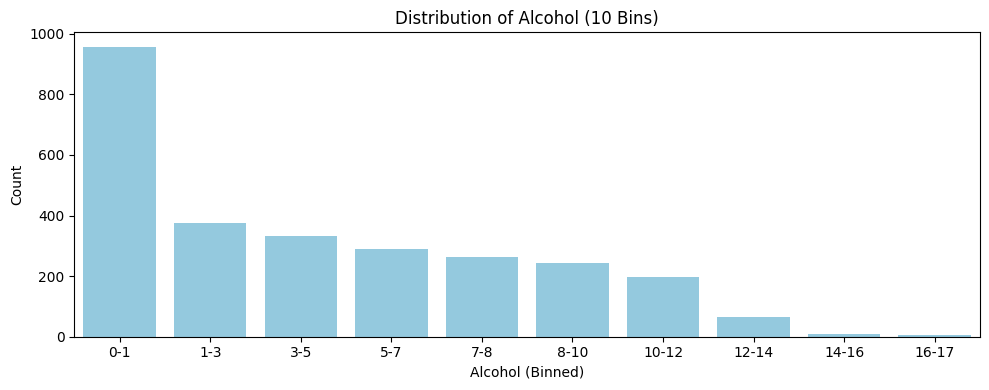

In [310]:

# Bar plot to visualize the distribution of 'Alcohol' column with 10 bins

# Create 10 bins for Alcohol values
bins = np.linspace(0, training_df_clean['Alcohol'].max(), 11)  # 10 equal-width bins from 0 to 100
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
training_df_clean['HepB_bins'] = pd.cut(training_df_clean['Alcohol'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 4))
sns.countplot(x='HepB_bins', data=training_df_clean, color='skyblue')
plt.title('Distribution of Alcohol (10 Bins)')
plt.xlabel('Alcohol (Binned)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


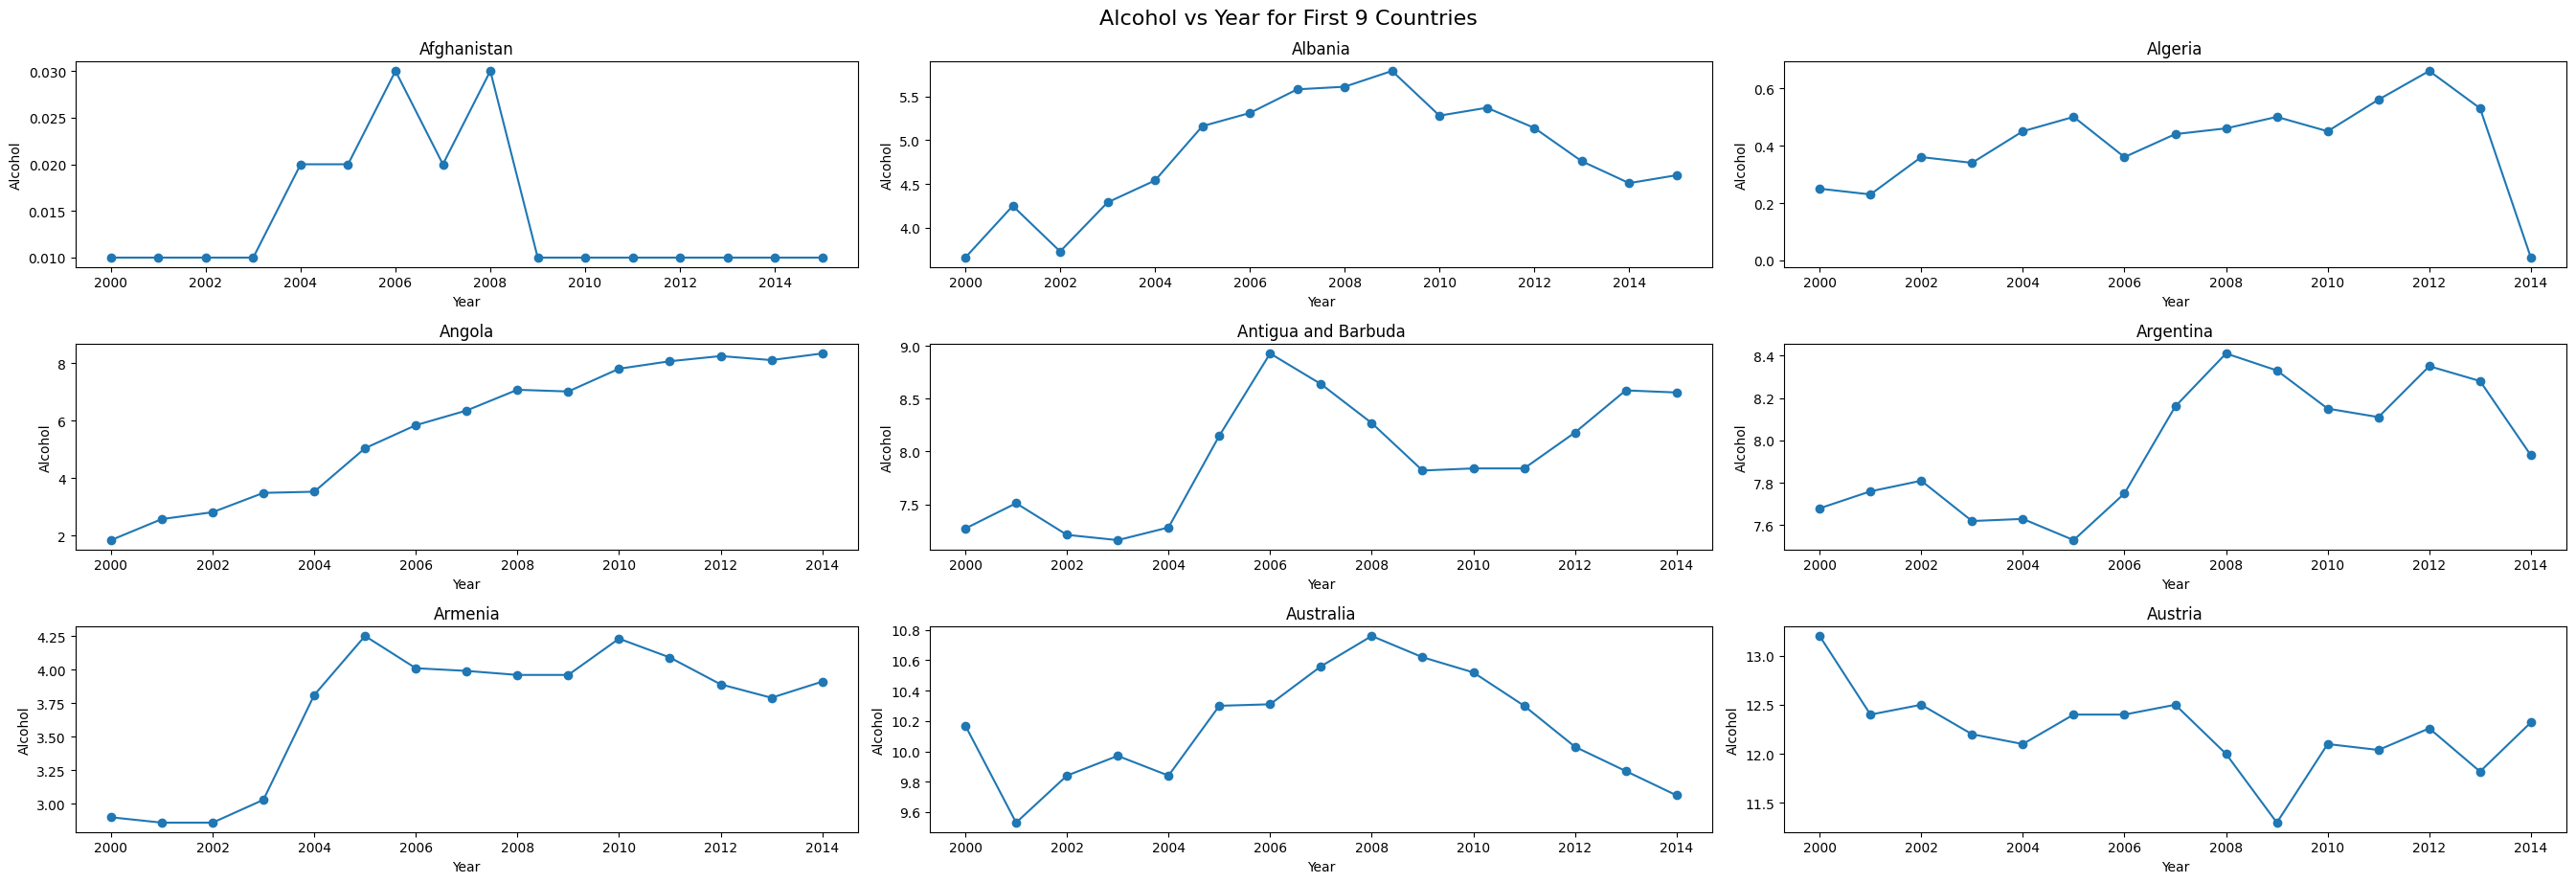

In [311]:

# Plot Alcohol vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Alcohol'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Alcohol')
    plt.tight_layout()

plt.suptitle('Alcohol vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


In [312]:

# Show number of null values in 'Alcohol' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Alcohol'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
South Sudan                           16
Montenegro                             2
Antigua and Barbuda                    1
Angola                                 1
Armenia                                1
                                      ..
Venezuela (Bolivarian Republic of)     1
Viet Nam                               1
Yemen                                  1
Zambia                                 1
Zimbabwe                               1
Name: Alcohol, Length: 177, dtype: int64

### E.3 Fixing "Outliers in the final list of features"



---
## D. Feature Selection


### D. 0 Approach 0 Comapre the numerical and categorical features with target varibale using plot and visuals

### D.1 Approach 1: Correlation Matrix

### D.2 Approach 2: ANOVA

### D.z Final Selection of Features


In [ ]:
features_list = []

---
## F. Feature Engineering

### F.1 Copy Datasets



In [82]:
# Create copy of datasets

training_df_eng = training_df_clean.copy()


### F.2 New Feature ""






---
## G. Data Transformation

### G.1 Copy Datasets



In [83]:
# Create copy of datasets

training_df_trans = training_df_eng.copy()


### G.2 Data Transformation Encoding the categorical features 



---
## H. Data Preparation for Modeling

### H.1 Copy Datasets



In [84]:


# Split into train (70%), temp (30%)
train_df, temp_df = train_test_split(training_df_eng, test_size=0.3, random_state=42)

# Split temp into validation (15%) and test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (2056, 22)
Validation shape: (441, 22)
Test shape: (441, 22)


### H.2 Split Features and Target Variables

In [85]:

X_train = train_df.drop(columns=[target_name])
y_train = train_df[target_name]

X_val = val_df.drop(columns=[target_name])
y_val = val_df[target_name]

X_test = test_df.drop(columns=[target_name])
y_test = test_df[target_name]

---
## I. Save Datasets

> Do not change this code

In [86]:
# Ensure the processed data directory exists
os.makedirs('../data/processed', exist_ok=True)


In [87]:

X_train.to_csv('../data/processed/X_train.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)

---
## J. Assess Baseline Model

### J.1 Generate Predictions with Baseline Model

In [88]:


dummy_regressor = DummyRegressor(strategy="mean")  # Predicts the mean of the target values
dummy_regressor.fit(X_train, y_train)
y_pred = dummy_regressor.predict(X_val)
y_pred



ValueError: Input y contains NaN.

### J.2 Selection of Performance Metrics




In [ ]:

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")


RMSE: 71.41122641110427


In [ ]:
mae = mean_absolute_error(y_val, y_pred)
print(f"MAE: {mae}")

MAE: 28.384357945254933


### J.3 Baseline Model Performance




In [ ]:

y_pred = dummy_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 86.92117365503061


In [ ]:
# Calculating accuracy within RMSE range
allowed_range_lower = y_test - rmse
allowed_range_upper = y_test + rmse

within_range = np.logical_and(y_pred >= allowed_range_lower, y_pred <= allowed_range_upper)
accuracy = np.sum(within_range) / len(y_test) * 100

print(f"Accuracy within RMSE range: {accuracy:.2f}%")


Accuracy within RMSE range: 87.83%


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 39.73232608655444


In [ ]:
# Calculating accuracy within mae range
allowed_range_lower = y_test - mae
allowed_range_upper = y_test + mae

within_range = np.logical_and(y_pred >= allowed_range_lower, y_pred <= allowed_range_upper)
accuracy = np.sum(within_range) / len(y_test) * 100

print(f"Accuracy within mae range: {accuracy:.2f}%")


Accuracy within mae range: 76.61%
